In [1]:
from IPython.utils.text import columnize
import sympy as sp
import sympy.physics.vector as spv

import IPython.display as ipd

spv.init_vprinting()
%matplotlib inline

In [2]:
def directory(obj):
    return [
        str for str in dir(obj) if callable(getattr(obj, str) ) # & ~str.startswith("_")
    ]

In [3]:
print(columnize(directory(ipd)))

Audio          JSON               Video               display_markdown      
Code           Javascript         VimeoVideo          display_pdf           
DisplayHandle  Latex              YouTubeVideo        display_png           
DisplayObject  Markdown           clear_output        display_pretty        
FileLink       Math               display             display_svg           
FileLinks      Pretty             display_html        publish_display_data  
GeoJSON        ProgressBar        display_javascript  set_matplotlib_close  
HTML           SVG                display_jpeg        set_matplotlib_formats
IFrame         ScribdDocument     display_json        update_display        
Image          TextDisplayObject  display_latex     



In [4]:
print(columnize(dir(sp.S)))

Catalan           Naturals            __dir__            __ne__             
ComplexInfinity   Naturals0           __doc__            __new__            
Complexes         NegativeInfinity    __eq__             __reduce__         
EmptySequence     NegativeOne         __format__         __reduce_ex__      
EmptySet          One                 __ge__             __repr__           
EulerGamma        Pi                  __getattr__        __setattr__        
Exp1              Rationals           __getattribute__   __sizeof__         
GoldenRatio       Reals               __gt__             __slots__          
Half              TribonacciConstant  __hash__           __str__            
IdentityFunction  UniversalSet        __init__           __subclasshook__   
ImaginaryUnit     Zero                __init_subclass__  _classes_to_install
Infinity          __call__            __le__             false              
Integers          __class__           __lt__             register           

In [5]:
HALF = sp.S.Half
PI = sp.pi
E = sp.exp
POSITIVEINFINITY = sp.S.Infinity

# Support Functions

In [6]:
def reference_frame(
    frame: str, x=r"\imath", y=r"\jmath", z=r"\mathbf k"
) -> spv.ReferenceFrame:
    return spv.ReferenceFrame(
        frame,
        latexs=(
            rf"\; {{}}^\mathcal {frame} \hat {x}",
            rf"\;{{}}^\mathcal {frame} \hat {y}",
            rf"\: {{}}^\mathcal {frame} \hat {{z}}",
        ),
    )


def RAOreference_frame(frame: str, x=r"e_1", y="e_2", z=r"e_3") -> spv.ReferenceFrame:
    return spv.ReferenceFrame(
        frame,
        latexs=(
            rf"\; {{}}^{frame} \hat {x}",
            rf"\;{{}}^{frame} \hat {y}",
            rf"\: {{}}^{frame} \hat {z}",
        ),
    )


def vector(F: spv.ReferenceFrame, rx, ry, rz=0) -> spv.Vector:
    return rx * F.x + ry * F.y + rz * F.z


def vector_cos(
    F: spv.ReferenceFrame, magnitude, angle_x, angle_y, angle_z=sp.pi / 2
) -> spv.Vector:
    return magnitude * (
        sp.cos(angle_x) * F.x + sp.cos(angle_y) * F.y + sp.cos(angle_z) * F.z
    )


def vector_line(start: spv.Vector, finish: spv.Vector) -> spv.Vector:
    return finish - start


def vector_line_eqn(
    F: spv.ReferenceFrame, start: spv.Vector, finish: spv.Vector, kappa
) -> spv.Vector:
    return start + vector_line(start, finish).normalize() * kappa


def angle_between_vectors(a: spv.Vector, b: spv.Vector):
    return sp.acos(a.dot(b) / a.magnitude() / b.magnitude())


def make_2D_symbols(symbol_list):
    return [sp.symbols(f"{ch}_x:y", real=True) for ch in symbol_list]


F, E = make_2D_symbols(["F", "E"])
assert str(F) == "(F_x, F_y)"
assert str(E) == "(E_x, E_y)"

In [7]:
E = RAOreference_frame("E", "E_1", "E_2", "E_3")
E.x, E.y, E.z

In [8]:
A = RAOreference_frame("A")

A.x, A.y, A.z

In [9]:
c = sp.symbols("c_{{1:4}{1:4}}")
c

# DCM
The orientation of a specific frame relative to its parent

In [10]:
A_DCM_E = sp.Matrix(3, 3, c)
A_DCM_E

⎡c_{{1}{1}}  c_{{1}{2}}  c_{{1}{3}}⎤
⎢                                  ⎥
⎢c_{{2}{1}}  c_{{2}{2}}  c_{{2}{3}}⎥
⎢                                  ⎥
⎣c_{{3}{1}}  c_{{3}{2}}  c_{{3}{3}}⎦

__Orient Explicit__

Sets the orientation of this reference frame relative to a 
parent reference frame by explicitly setting the direction 
cosine matrix.

In [11]:
A.orient_explicit(E, A_DCM_E)

__Returns the direction cosine matrix__

The returned A matrix can be used A to express the orthogonal unit vectors 
of this frame in terms of the orthogonal unit vectors of otherframe.

Notice that for ${}^{\mathcal E} \mathbf {e}_2$ is represents in the second row of E.dcm(A)

In [12]:
E.dcm(A), E.y.express(A)

⎛⎡c_{{1}{1}}  c_{{1}{2}}  c_{{1}{3}}⎤, c_{{2}{1}} a_x + c_{{2}{2}} a_y + c_{{2
⎜⎢                                  ⎥                                         
⎜⎢c_{{2}{1}}  c_{{2}{2}}  c_{{2}{3}}⎥                                         
⎜⎢                                  ⎥                                         
⎝⎣c_{{3}{1}}  c_{{3}{2}}  c_{{3}{3}}⎦                                         

}{3}} a_z⎞
         ⎟
         ⎟
         ⎟
         ⎠

In [13]:
a, b = [sp.symbols(f"{ch}_1:4") for ch in ["a", "b"]]
a, b

In [14]:
E.dcm(A)  # represent E unit in term of A

⎡c_{{1}{1}}  c_{{1}{2}}  c_{{1}{3}}⎤
⎢                                  ⎥
⎢c_{{2}{1}}  c_{{2}{2}}  c_{{2}{3}}⎥
⎢                                  ⎥
⎣c_{{3}{1}}  c_{{3}{2}}  c_{{3}{3}}⎦

In [15]:
E.dcm(A) * sp.Matrix(3, 1, a)

⎡a₁⋅c_{{1}{1}} + a₂⋅c_{{1}{2}} + a₃⋅c_{{1}{3}}⎤
⎢                                             ⎥
⎢a₁⋅c_{{2}{1}} + a₂⋅c_{{2}{2}} + a₃⋅c_{{2}{3}}⎥
⎢                                             ⎥
⎣a₁⋅c_{{3}{1}} + a₂⋅c_{{3}{2}} + a₃⋅c_{{3}{3}}⎦

In [16]:
(a[0] * A.x + a[1] * A.y + a[2] * A.z).express(E)

# Frame differentiation DCM

![](./images/Example02-01.png)

In [17]:
R, omega, t = sp.symbols("R, omega, t", real=True, positive=True)
F = RAOreference_frame("F")
A = RAOreference_frame("A")
A.orient_axis(F, F.z, omega * t)
vecR_in_A = R * A.x

In [18]:
vecR_in_A.diff(t, F).express(F).simplify(), vecR_in_A.diff(t, A)

## Unit vectors in another frame

The following __rows__ gives the unit vectors of $\mathcal A$ expressed in
$\mathcal F$.

In [19]:
A.dcm(F)

⎡cos(ω⋅t)   sin(ω⋅t)  0⎤
⎢                      ⎥
⎢-sin(ω⋅t)  cos(ω⋅t)  0⎥
⎢                      ⎥
⎣    0         0      1⎦

In [20]:
A.variable_map(F)

In [21]:
vecR_in_A.express(F), (A.dcm(F)) * sp.Matrix([R, 0, 0])

⎛R⋅cos(ω⋅t) f_x + R⋅sin(ω⋅t) f_y, ⎡R⋅cos(ω⋅t) ⎤⎞
⎜                                 ⎢           ⎥⎟
⎜                                 ⎢-R⋅sin(ω⋅t)⎥⎟
⎜                                 ⎢           ⎥⎟
⎝                                 ⎣     0     ⎦⎠

# Dynamic variables

![](./images/Example02-02.jpg/)

__With dynamic symbols__

In [22]:
omega, t = sp.symbols("Omega t", real=True, positive=True)
x, y, theta = spv.dynamicsymbols("x, y, theta", level=0)
theta.diff()

In [23]:
F = RAOreference_frame("F", x=r"E_x", y=r"E_y", z=r"E_z")
A = RAOreference_frame("A", x=r"e_x", y=r"e_y", z=r"e_z")
A.orient_axis(F, F.z, theta)

In [24]:
vecP = x * A.x + y * A.y
dvecP_A, dvecP_F = vecP.dt(A), vecP.dt(F)
ddvecP_A, ddvecP_F = (dvecP_A.diff(sp.Symbol("t"), A), dvecP_F.diff(sp.Symbol("t"), F))


In [25]:
dvecP_F.subs(theta.diff(), omega)

In [26]:
(ddvecP_F.subs(theta.diff().diff(), 0).subs(theta.diff(), omega).simplify())

In [27]:
t = sp.symbols("Omega t", real=True, positive=True)
x, y, theta = spv.dynamicsymbols("x, y, theta", level=0)
Omega = theta.diff()
x, y, theta, Omega

In [28]:
F = RAOreference_frame("F", x=r"E_x", y=r"E_y", z=r"E_z")
A = RAOreference_frame("A", x=r"e_x", y=r"e_y", z=r"e_z")
A.orient_axis(F, F.z, theta)

In [29]:
vecP = x * A.x + y * A.y
vecP.dt(A), vecP.dt(F), vecP.dt(F).subs(theta.diff(), omega)

In [30]:
dvecP = vecP.diff(sp.symbols("t"), F) 
ddvecP = dvecP.diff(sp.symbols("t"), F) 
(
    ddvecP.subs(theta.diff().diff(), 0)
    .subs(theta.diff(), omega)
    .simplify()
)

In [31]:
F = RAOreference_frame("F", x=r"E_x", y=r"E_y", z=r"E_z")
A = RAOreference_frame("A", x=r"e_x", y=r"e_y", z=r"e_z")
A.orient_axis(F, F.z, theta)

In [32]:
vecP = x * A.x + y * A.y
dvecP = vecP.diff(sp.Symbol("t"), F) 
ddvecP = dvecP.diff(sp.Symbol("t"), F)
dvecP.subs(theta.diff(), omega)

In [33]:
(ddvecP.subs(theta.diff().diff(), 0).subs(theta.diff(), omega).simplify())

__With Functions of time__

In [34]:
omega, t = sp.symbols("Omega t", real=True, positive=True)
x, y, theta = sp.symbols("x, y, theta", cls=sp.Function)
x, y, theta, x(t), y(t), theta(t)

(x, y, theta, x(t), y(t), theta(t))

In [35]:
F = RAOreference_frame("F", x=r"E_x", y=r"E_y", z=r"E_z")
A = RAOreference_frame("A", x=r"e_x", y=r"e_y", z=r"e_z")
A.orient_axis(F, F.z, theta(t))

In [36]:
vecP = x(t) * A.x + y(t) * A.y
vecP

In [37]:
(vecP.diff(t, F).simplify().subs(theta(t).diff(t), omega))

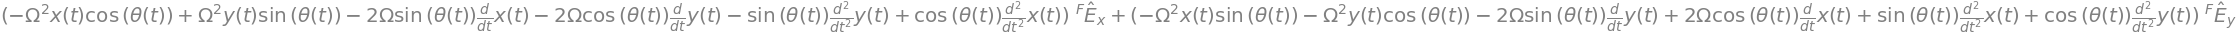

In [38]:
(
    vecP.diff(t, F)
    .diff(t, F)
    .simplify()
    .subs(theta(t).diff(t).diff(t), 0)
    .subs(theta(t).diff(t), omega)
)

# Rotation Formulae

$$
{}^{\mathcal A} \mathbf v = 
        {}^{\mathcal A}\frac{d \mathbf r}{d t} =
            {}^{\mathcal B}\frac{d \mathbf r}{d t} +
                {}^A{\mathbf \omega^B} \times \mathbf r 
$$

$$
{}^{\mathcal A} \mathbf v = 
    {}^{\mathcal B} \mathbf v +
        {}^A{\mathbf \omega^B} \times \mathbf r
$$


$$
{}^{\mathcal A} \mathbf a = 
    {}^{\mathcal B} \mathbf a 
        + {}^A \alpha^\mathcal{B} \times \mathbf r 
        + { 2 \cdot {}^A{\mathbf \omega^B} } \times {}^{\mathcal B} \mathbf v
        + x {}^A{\mathbf \omega^B} \times ({}^A{\mathbf \omega^B} \times \mathbf r²)
$$


In [39]:
omega, t = sp.symbols("Omega t", real=True, positive=True)
x, y, theta = sp.symbols("x, y, theta", cls=sp.Function)
x, y, theta, x(t), y(t), theta(t)

(x, y, theta, x(t), y(t), theta(t))

In [40]:
vecP = x(t) * A.x + y(t) * A.y
vecP

In [41]:
vecP.diff(t, A)

In [42]:
(vecP.diff(t, A) + spv.cross(theta(t).diff(t) * F.z, vecP)).express(A)  # .simplify()

# Translation

\begin{split}
    \mathbf{r}^{OP} \textrm{, the position vector from } O\textrm{ to }P\\
    ^{\mathbf{N}}\mathbf{v}^P \textrm{, the velocity of } P
        \textrm{ in the reference frame } \mathbf{N}\\
    ^{\mathbf{N}}\mathbf{a}^P \textrm{, the acceleration of } P
        \textrm{ in the reference frame } \mathbf{N}\\
\end{split}

In [43]:
N = RAOreference_frame("N", x=r"n_x", y=r"n_y", z=r"n_z")

In [44]:
q_x, q_y = spv.dynamicsymbols("q_x, q_y", level=0)

In [45]:
r_OP = q_x * N.x + q_y * N.y
v_NP = r_OP.dt(N)
a_NP = v_NP.diff(sp.Symbol('t'), N)

ipd.display(
    ipd.Math( # type: ignore
        rf"$ {spv.vlatex(r_OP)}\quad "
        rf"  {spv.vlatex(v_NP)}\quad "
        rf"  {spv.vlatex(a_NP)}\quad $"
    )
)

<IPython.core.display.Math object>

__Translating, rotating disc__

![](./images/kin_1.png)

__Solution to rotating disc using Vectors directly and not using 
point theory__

see example in [this document](https://docs.sympy.org/latest/modules/physics/vector/kinematics.html)

In [46]:
u_1, u_2, u_3 = spv.dynamicsymbols("u_1, u_2, u_3", level=0)
o_1, o_2, o_3 = spv.dynamicsymbols("o_1, o_2, o_3", level=0)
R = sp.symbols("R", real=True, positive=True)

In [47]:
N = reference_frame("N", x=r"x", y=r"y", z=r"z")
B = reference_frame("B", x=r"x", y=r"y", z=r"z")
B.set_ang_vel(N, u_3 * B.z)

In [48]:
r_O = o_1 * N.x + o_2 * N.y + o_3 * N.z
r_O

o₁ n_x + o₂ n_y + o₃ n_z

In [49]:
r_P = r_O + R * B.x
r_P

o₁ n_x + o₂ n_y + o₃ n_z + R b_x

In [50]:
(r_P.dt(N).subs(o_1.diff(), u_1).subs(o_2.diff(), u_2).subs(o_3.diff(), 0))

u₁ n_x + u₂ n_y + R⋅u₃ b_y

In [51]:
(
    r_P.dt(N)
    .dt(N)
    .subs(o_1.diff().diff(), u_1.diff())
    .subs(o_2.diff().diff(), u_2.diff())
    .subs(o_3.diff().diff(), 0)
)

                       2
u₁̇ n_x + u₂̇ n_y + -R⋅u₃  b_x + R⋅u₃̇ b_y

# Intrinsic coordinates

In [52]:
F = RAOreference_frame("F", x=r"E_x", y=r"E_y", z=r"E_z")
m, g, R = sp.symbols("m, g, R", real=True, positive=True)
r = spv.dynamicsymbols("r", real=True, level=0)
y = r**2 / 2 / R
P = r * F.x + y * F.y
vtP = P.dt(F)

In [53]:
hat_vtP = vtP.normalize()
hat_vnP = F.z.cross(hat_vtP)
assert hat_vtP.magnitude().simplify() == 1
assert hat_vnP.magnitude().simplify() == 1  # Unit vector
assert hat_vtP.dot(hat_vnP) == 0  # Orthogonal